In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Abdelrahman/Documents/task2-EDA/multiple dataset _Copy.csv")
df.head()

,postId,comment,score,topic
0,f06aa998054e11eba66e646e69d991ea,علينا الاهتمام ببيت الابحاث العلمية و المختبرا...,-9,art-et-culture
1,a31ed992055111ebb86b646e69d991ea,انا لله واليه راجعون.الله ارحمو واغفر ليه.ولدو...,11,art-et-culture
2,a31ed992055111ebb86b646e69d991ea,إنا لله و إنا إليه راجعون رحم الله الفقيد و رز...,7,art-et-culture
3,a31ed992055111ebb86b646e69d991ea,إنا لله و إنا إليه راجعون. ذكريات جميلة لممثل ...,8,art-et-culture
4,a31ed992055111ebb86b646e69d991ea,نغمذ الله روح الفقيد واسكنه قسيح جناته انا لله...,6,art-et-culture


In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.head(8)

,postId,comment,score,topic
0,06bda09e056011ebaaf7646e69d991ea,جمهور من الفقر. والاطفال........ فوضى. و قلة ا...,56,sport
1,0c71d786056011eb85c1646e69d991ea,لقد نسيت اسم المدرب الوطني نظرا لمدة العطالة ا...,16,sport
2,93f495fe055211eba771646e69d991ea,التفاهة اصبحت روتينا يوميا مستهلكا ، ماذا جنين...,112,art-et-culture
3,cc25c3d804f311eb8c9c646e69d991ea,السلام عليكم هل في علمكم ان طبيبتان تعملان في ...,26,medias
4,b984465004f311ebbc8b646e69d991ea,تنبيه للدولة :\nكفى من إعطاء الأهمية المبالغ ف...,47,medias
5,a787eaa4055211eb9e8c646e69d991ea,تحية خاصة للفنانة القديرة لطيفة رافت. انت من ا...,12,art-et-culture
6,f871c9ca055f11ebbee0646e69d991ea,هنيءا للرجاء وعقبى للقادم من المباريات وللفريق...,15,sport
7,7a2691e804f811eb9ec6646e69d991ea,dans toutes les administrations ils font des f...,1,medias


In [5]:
df.drop("postId",axis=1,inplace=True)

In [6]:
df.head()

,comment,score,topic
0,جمهور من الفقر. والاطفال........ فوضى. و قلة ا...,56,sport
1,لقد نسيت اسم المدرب الوطني نظرا لمدة العطالة ا...,16,sport
2,التفاهة اصبحت روتينا يوميا مستهلكا ، ماذا جنين...,112,art-et-culture
3,السلام عليكم هل في علمكم ان طبيبتان تعملان في ...,26,medias
4,تنبيه للدولة :\nكفى من إعطاء الأهمية المبالغ ف...,47,medias


In [7]:
df.shape

(4408, 3)

In [8]:
df.topic.value_counts()

sport             1521
medias            1509
art-et-culture    1378
Name: topic, dtype: int64

In [9]:
import string , nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
stop_words_list = nltk.corpus.stopwords.words("arabic")
stop_words_list[:10]

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي']

In [11]:
porter = nltk.PorterStemmer()
lemma_nltk = WordNetLemmatizer()

In [12]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = " ".join([lemma_nltk.lemmatize(word) for word in tokens if word not in stop_words_list])
    return text

In [13]:
df['cleaned_comments'] = df['comment'].apply(lambda x:clean_text(x))

In [14]:
df.head(8)

,comment,score,topic,cleaned_comments
0,جمهور من الفقر. والاطفال........ فوضى. و قلة ا...,56,sport,جمهور الفقر والاطفال فوضى قلة ادب عيب والله ار...
1,لقد نسيت اسم المدرب الوطني نظرا لمدة العطالة ا...,16,sport,لقد نسيت اسم المدرب الوطني نظرا لمدة العطالة ا...
2,التفاهة اصبحت روتينا يوميا مستهلكا ، ماذا جنين...,112,art-et-culture,التفاهة اصبحت روتينا يوميا مستهلكا ، جنينا الف...
3,السلام عليكم هل في علمكم ان طبيبتان تعملان في ...,26,medias,السلام عليكم علمكم ان طبيبتان تعملان المستعجلا...
4,تنبيه للدولة :\nكفى من إعطاء الأهمية المبالغ ف...,47,medias,تنبيه للدولة كفى إعطاء الأهمية المبالغ للصحافة...
5,تحية خاصة للفنانة القديرة لطيفة رافت. انت من ا...,12,art-et-culture,تحية للفنانة القديرة لطيفة رافت انت الفنانات ن...
6,هنيءا للرجاء وعقبى للقادم من المباريات وللفريق...,15,sport,هنيءا للرجاء وعقبى للقادم المباريات وللفريق ال...
7,dans toutes les administrations ils font des f...,1,medias,dans toutes le administration il font de fosse...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [16]:
bow_vec = CountVectorizer()
bow_matrix = bow_vec.fit_transform(df['cleaned_comments'])

In [17]:
print("Sparse Matrix \n" , bow_matrix)

Sparse Matrix 
   (0, 22721)	1
  (0, 12750)	1
  (0, 39639)	1
  (0, 29636)	1
  (0, 30095)	1
  (0, 5895)	1
  (0, 28135)	1
  (0, 40774)	1
  (0, 5987)	1
  (0, 11944)	1
  (0, 46935)	1
  (0, 22406)	1
  (0, 15964)	1
  (0, 24709)	1
  (0, 8364)	1
  (0, 35233)	1
  (0, 36335)	1
  (0, 30637)	1
  (0, 26984)	1
  (0, 6646)	1
  (0, 17240)	1
  (0, 40521)	1
  (0, 21183)	1
  (0, 47434)	1
  (0, 36141)	1
  :	:
  (4406, 19690)	1
  (4406, 38020)	1
  (4406, 26370)	1
  (4406, 21456)	1
  (4406, 42665)	1
  (4406, 24818)	1
  (4406, 11011)	1
  (4406, 12403)	1
  (4406, 3943)	1
  (4406, 4097)	1
  (4406, 31827)	1
  (4406, 4339)	1
  (4406, 36477)	1
  (4406, 9774)	1
  (4406, 15511)	1
  (4406, 42266)	1
  (4406, 42364)	1
  (4406, 43904)	1
  (4406, 38841)	1
  (4407, 34705)	1
  (4407, 34671)	1
  (4407, 32547)	1
  (4407, 12573)	1
  (4407, 24744)	1
  (4407, 34030)	1


In [18]:
arr_mat = bow_matrix.toarray()
arr_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
data = pd.DataFrame(arr_mat)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,47508,47509,47510,47511,47512,47513,47514,47515,47516,47517
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bow_matrix.shape

(4408, 47518)

In [21]:
ngram_vec = CountVectorizer(ngram_range=(1,2))
ngram_matrix = ngram_vec.fit_transform(df['cleaned_comments'])

In [22]:
print("Sparse Matrix is \n" , ngram_matrix)

Sparse Matrix is 
   (0, 89900)	1
  (0, 49386)	1
  (0, 149460)	1
  (0, 116491)	1
  (0, 118305)	1
  (0, 19886)	1
  (0, 111257)	1
  (0, 152332)	1
  (0, 20247)	1
  (0, 45295)	1
  (0, 171181)	1
  (0, 88673)	1
  (0, 66497)	1
  (0, 97923)	1
  (0, 28920)	1
  (0, 135050)	1
  (0, 138829)	1
  (0, 120666)	1
  (0, 106080)	1
  (0, 22274)	1
  (0, 72208)	1
  (0, 151678)	1
  (0, 84480)	1
  (0, 173039)	1
  (0, 138173)	1
  :	:
  (4406, 34669)	1
  (4406, 63525)	1
  (4406, 35070)	1
  (4406, 168947)	1
  (4406, 93878)	1
  (4406, 156448)	1
  (4406, 79942)	1
  (4406, 156722)	1
  (4406, 13496)	1
  (4406, 161513)	1
  (4406, 147409)	1
  (4406, 171286)	1
  (4406, 159110)	1
  (4406, 17088)	1
  (4407, 133249)	1
  (4407, 133107)	1
  (4407, 126651)	1
  (4407, 48433)	1
  (4407, 48451)	1
  (4407, 98080)	1
  (4407, 131219)	1
  (4407, 133278)	1
  (4407, 126668)	1
  (4407, 131223)	1
  (4407, 133115)	1


In [23]:
# from scipy.sparse import csr_matrix

In [24]:

# # Convert the ngram_matrix to a sparse matrix
# sparse_ngram_matrix = csr_matrix(ngram_matrix)

# # Create the feature_ngram DataFrame using the sparse matrix
# feature_ngram = pd.DataFrame(sparse_ngram_matrix.toarray())

# feature_ngram.head()

In [25]:
feature_ngram = pd.DataFrame(ngram_matrix.toarray())
feature_ngram.head()

,0,1,2,3,4,5,6,7,8,9,...,173310,173311,173312,173313,173314,173315,173316,173317,173318,173319
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['cleaned_comments'])

In [27]:
print("Sparse Matrix \n",tfidf_matrix)

Sparse Matrix 
   (0, 22300)	0.22458097077831798
  (0, 21533)	0.19223578302290756
  (0, 36141)	0.2009231867390849
  (0, 47434)	0.13353358501549478
  (0, 21183)	0.22458097077831798
  (0, 40521)	0.18878812526617403
  (0, 17240)	0.22458097077831798
  (0, 6646)	0.22458097077831798
  (0, 26984)	0.2009231867390849
  (0, 30637)	0.17625275995517714
  (0, 36335)	0.16513034122694095
  (0, 35233)	0.22458097077831798
  (0, 8364)	0.17255802777365806
  (0, 24709)	0.15068157622760253
  (0, 15964)	0.22458097077831798
  (0, 22406)	0.1514300077715668
  (0, 46935)	0.22458097077831798
  (0, 11944)	0.2009231867390849
  (0, 5987)	0.22458097077831798
  (0, 40774)	0.11865449204867903
  (0, 28135)	0.1805659427915345
  (0, 5895)	0.22458097077831798
  (0, 30095)	0.1664546869166539
  (0, 29636)	0.18878812526617403
  (0, 39639)	0.21411223456896314
  :	:
  (4406, 8729)	0.12934977563141176
  (4406, 30503)	0.09963057709770401
  (4406, 46326)	0.11791483513833002
  (4406, 10088)	0.10345238585816764
  (4406, 14780)	0.13

In [28]:
feature_tfidf = pd.DataFrame(tfidf_matrix.toarray())
feature_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,47508,47509,47510,47511,47512,47513,47514,47515,47516,47517
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
feature_tfidf.columns = tfidf.get_feature_names_out()
feature_tfidf.head()

,000,01,03,04092020,06,10,100,1000,10000,100000,...,ݣاوريات,ﻷلبيساء,ﻹبتداية,ﻹجراء,ﻻجل,ﻻموال,ﻻن,ﻻنه,ﻻية,ﻻيمكن
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df.head()

,comment,score,topic,cleaned_comments
0,جمهور من الفقر. والاطفال........ فوضى. و قلة ا...,56,sport,جمهور الفقر والاطفال فوضى قلة ادب عيب والله ار...
1,لقد نسيت اسم المدرب الوطني نظرا لمدة العطالة ا...,16,sport,لقد نسيت اسم المدرب الوطني نظرا لمدة العطالة ا...
2,التفاهة اصبحت روتينا يوميا مستهلكا ، ماذا جنين...,112,art-et-culture,التفاهة اصبحت روتينا يوميا مستهلكا ، جنينا الف...
3,السلام عليكم هل في علمكم ان طبيبتان تعملان في ...,26,medias,السلام عليكم علمكم ان طبيبتان تعملان المستعجلا...
4,تنبيه للدولة :\nكفى من إعطاء الأهمية المبالغ ف...,47,medias,تنبيه للدولة كفى إعطاء الأهمية المبالغ للصحافة...


In [31]:
matrix_tfidf = feature_tfidf.copy()
matrix_tfidf

,000,01,03,04092020,06,10,100,1000,10000,100000,...,ݣاوريات,ﻷلبيساء,ﻹبتداية,ﻹجراء,ﻻجل,ﻻموال,ﻻن,ﻻنه,ﻻية,ﻻيمكن
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
x = matrix_tfidf
y = df['topic']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [34]:
from sklearn.model_selection import *

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
# Create an instance of the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

In [39]:
naive_bayes_classifier.fit(x_train , y_train)

GaussianNB()

In [40]:
y_pred = naive_bayes_classifier.predict(x_test)
y_pred[:6]

array(['art-et-culture', 'art-et-culture', 'art-et-culture', 'sport',
       'medias', 'medias'], dtype='<U14')

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

In [42]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[172,  79,  33],
       [ 66, 193,  31],
       [ 50,  71, 187]], dtype=int64)

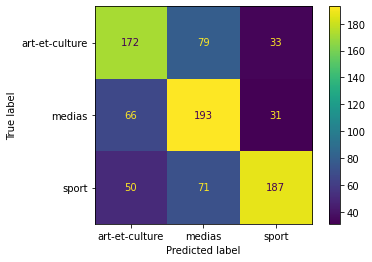

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=naive_bayes_classifier.classes_)
disp.plot()

In [45]:
acc = accuracy_score(y_test,y_pred)
acc

0.6258503401360545

In [46]:
from sklearn.metrics import classification_report

In [47]:
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

art-et-culture       0.60      0.61      0.60       284
        medias       0.56      0.67      0.61       290
         sport       0.75      0.61      0.67       308

      accuracy                           0.63       882
     macro avg       0.63      0.63      0.63       882
  weighted avg       0.64      0.63      0.63       882

